In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
from scipy.optimize import fsolve

In [2]:
G = 6.67e-11
Mt = 5.972e+24
Rt = 6.371e+6

In [3]:
print(G*Mt/Rt**2)

9.813646787366265


In [4]:
v0 = np.sqrt(G*Mt/Rt)
print(v0)

7907.132456352965


In [5]:
G = G*Mt / Rt**3
Mt = 1.
Rt = 1.
print(G)

1.540362076183686e-06


In [6]:
k = 1.
v0 = np.sqrt(G*Mt/Rt)*k
print(v0)

0.0012411132406769682


In [7]:
def System(t,r0):
    
    r,theta,vr,vtheta = r0
    
    ar = - G*Mt/r**2 + r*vtheta**2
    at = - 2*vr*vtheta / r
    
    return np.array([vr,vtheta,ar,at])

In [8]:
theta0 = np.pi/2.
r0_ = np.array([ Rt*np.cos(theta0), Rt*np.sin(theta0) ])

In [9]:
alpha = np.deg2rad(60)
v0_ = np.array([ v0*np.cos(alpha), v0*np.sin(alpha) ])

In [10]:
N = 500
t = np.linspace(0.,3000.,N+1)
#print(t)

In [11]:
r0 = np.array([Rt,theta0,v0_[0],v0_[1]])
solution = solve_ivp( System, (t[0],t[-1]), r0, t_eval = t, method = 'RK45' )

In [12]:
t = solution.t
r = solution.y[0]
theta = solution.y[1]

In [13]:
ii = np.argmax(r)
maxr = r[ii]
maxtheta = theta[ii]
maxt = t[ii]
print(maxr,maxtheta,maxt, maxt/60.)

1.4983305234887614 2.614467446449734 1662.0 27.7


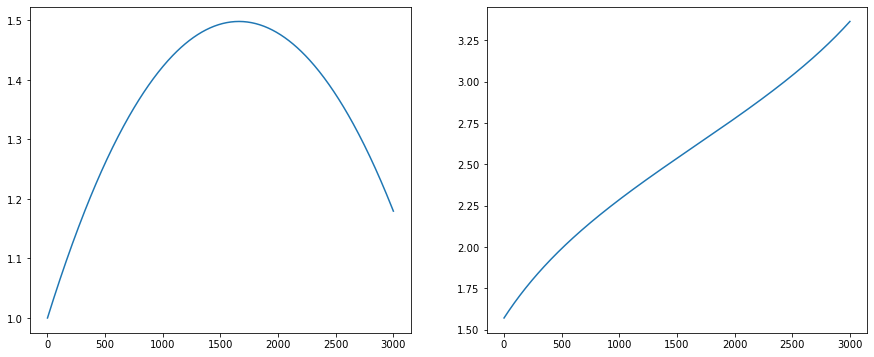

In [14]:
fig1 = plt.figure(figsize=(15,6))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)
ax1.plot(t,r)
ax2.plot(t,theta)

In [15]:
x = r*np.cos(theta)
y = r*np.sin(theta)

In [16]:
M = np.array([[0,-1],[1,0]])
v10_ = 100.0*np.dot( M, v0_ )

Text(0, 0.5, '$y[Rt]$')

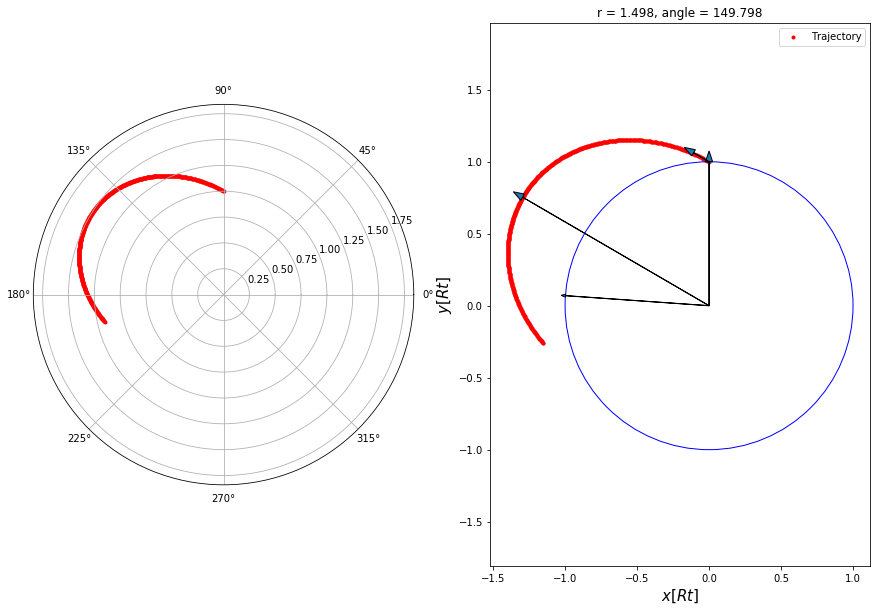

In [20]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1, projection='polar')
ax2 = fig.add_subplot(1,2,2,)
ax1.scatter(theta,r,marker='.',color='r')


ax2.set_title('r = %.3f, angle = %.3f'%(maxr, maxtheta*180/np.pi))

ax2.axis('equal')
circle = plt.Circle((0,0), 1, color='b', fill = False)
ax2.add_patch(circle)


ax2.scatter(x,y,marker='.',color='r', label='Trajectory')
ax2.arrow( 0.,0., r0_[0], r0_[1], head_width=0.05, label=r'$\vec{r}$')
ax2.arrow( r0_[0], r0_[1], v10_[0], v10_[1], head_width=0.05 )
ax2.arrow( 0., 0., maxr*np.cos(maxtheta), maxr*np.sin(maxtheta), head_width=0.05 )

ax2.arrow( 0.,0., np.cos(3.07177), np.sin(3.07177), head_width=0.02  )

ax2.legend(loc=1)
ax2.set_xlabel(r'$x[Rt]$',fontsize=15)
ax2.set_ylabel(r'$y[Rt]$',fontsize=15)
#plt.savefig('Satelite.pdf')